# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [4]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

print("Dataset loaded!")
print(f"Total songs: {len(df)}")
print("\nFirst few rows:")
df.head()

Dataset loaded!
Total songs: 953

First few rows:


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6



BPM ANALYSIS
Average BPM: 122.5
Most common BPM: 120
Lowest BPM: 65
Highest BPM: 206

Slow (60-100 BPM): 254 songs
Medium (100-140 BPM): 461 songs
Fast (140+ BPM): 238 songs

✨ RECOMMENDATION: Use BPM between 100-140 (most common range)


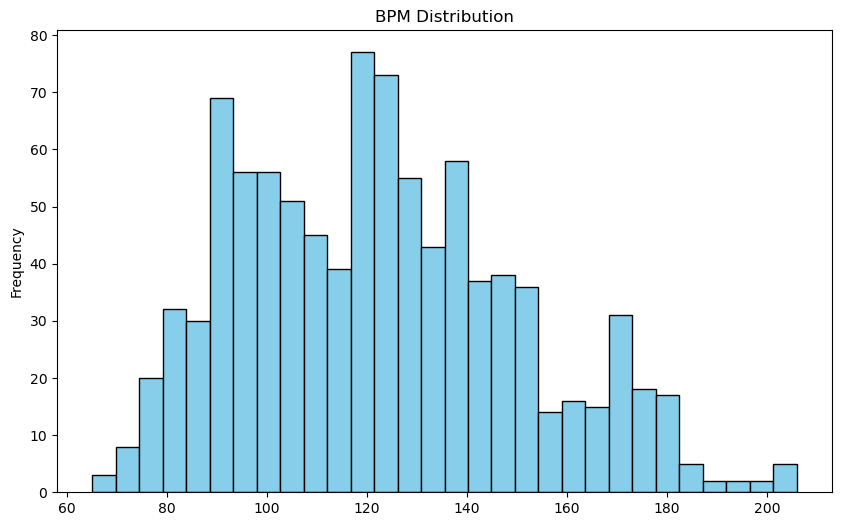

In [5]:
print("\n" + "="*80)
print("BPM ANALYSIS")
print("="*80)

print(f"Average BPM: {df['bpm'].mean():.1f}")
print(f"Most common BPM: {df['bpm'].mode()[0]}")
print(f"Lowest BPM: {df['bpm'].min()}")
print(f"Highest BPM: {df['bpm'].max()}")

# Count songs in different BPM ranges
slow_songs = len(df[df['bpm'] <= 100])
medium_songs = len(df[(df['bpm'] > 100) & (df['bpm'] <= 140)])
fast_songs = len(df[df['bpm'] > 140])

print(f"\nSlow (60-100 BPM): {slow_songs} songs")
print(f"Medium (100-140 BPM): {medium_songs} songs")
print(f"Fast (140+ BPM): {fast_songs} songs")

# CHART: BPM Distribution
df['bpm'].plot(kind='hist', bins=30, title='BPM Distribution', 
               figsize=(10, 6), color='skyblue', edgecolor='black')

print("\n✨ RECOMMENDATION: Use BPM between 100-140 (most common range)")


KEY ANALYSIS
Songs per key:
key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

✨ RECOMMENDATION: Use the key C# (most popular)


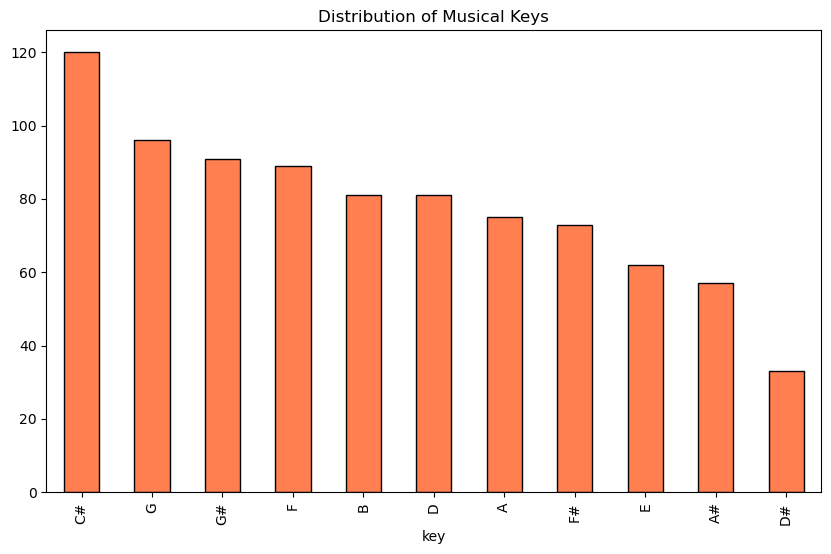

In [7]:
print("\n" + "="*80)
print("KEY ANALYSIS")
print("="*80)

# Count how many songs use each key
key_counts = df['key'].value_counts()
print("Songs per key:")
print(key_counts)

# CHART: Key Distribution 
key_counts.plot(kind='bar', title='Distribution of Musical Keys',
                figsize=(10, 6), color='coral', edgecolor='black')

print(f"\n✨ RECOMMENDATION: Use the key {key_counts.index[0]} (most popular)")


MODE ANALYSIS
mode
Major    550
Minor    403
Name: count, dtype: int64

✨ RECOMMENDATION: Use Major mode


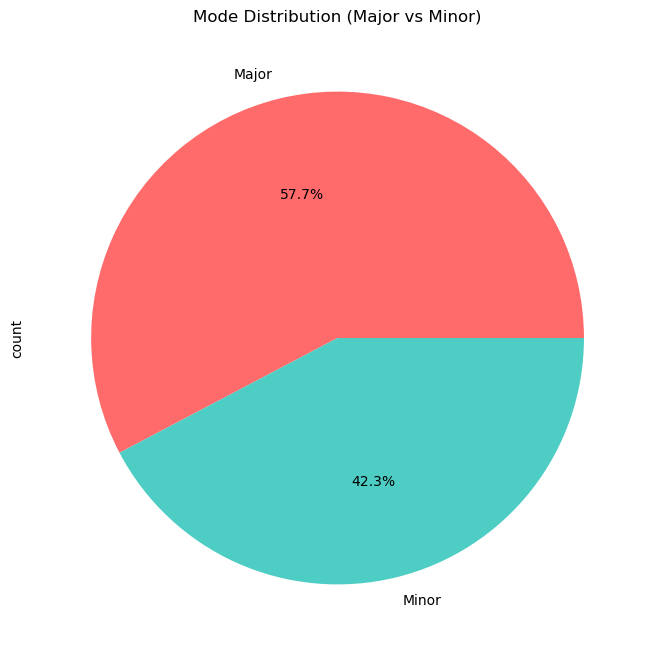

In [8]:
print("\n" + "="*80)
print("MODE ANALYSIS")
print("="*80)

mode_counts = df['mode'].value_counts()
print(mode_counts)

# CHART: Mode Distribution 
mode_counts.plot(kind='pie', title='Mode Distribution (Major vs Minor)',
                 figsize=(8, 8), autopct='%1.1f%%', 
                 colors=['#FF6B6B', '#4ECDC4'])

print(f"\n✨ RECOMMENDATION: Use {mode_counts.index[0]} mode")


DANCEABILITY ANALYSIS
Average danceability: 67.0%
Lowest: 23%
Highest: 96%

Low (0-50%): 136 songs
Medium (50-70%): 389 songs
High (70-100%): 428 songs

✨ RECOMMENDATION: Danceability between 50-70%


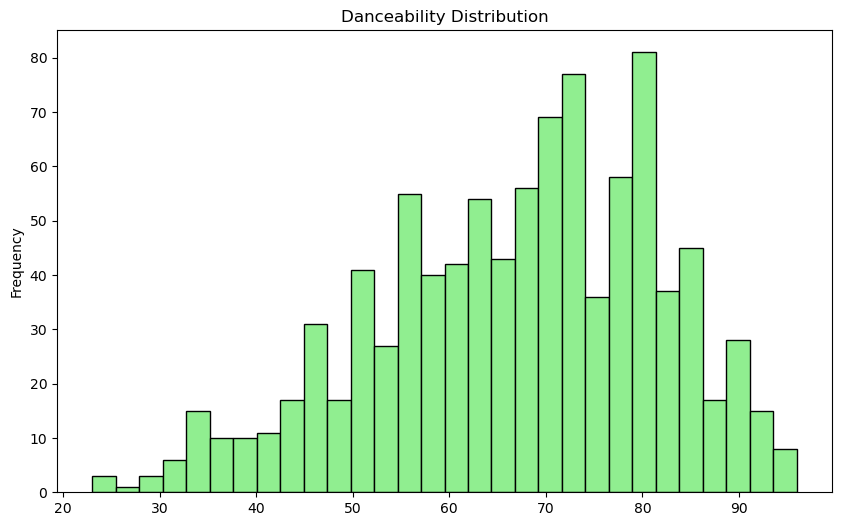

In [9]:
print("\n" + "="*80)
print("DANCEABILITY ANALYSIS")
print("="*80)

print(f"Average danceability: {df['danceability_%'].mean():.1f}%")
print(f"Lowest: {df['danceability_%'].min()}%")
print(f"Highest: {df['danceability_%'].max()}%")

# Count by ranges
low_dance = len(df[df['danceability_%'] <= 50])
med_dance = len(df[(df['danceability_%'] > 50) & (df['danceability_%'] <= 70)])
high_dance = len(df[df['danceability_%'] > 70])

print(f"\nLow (0-50%): {low_dance} songs")
print(f"Medium (50-70%): {med_dance} songs")
print(f"High (70-100%): {high_dance} songs")

# CHART: Danceability Distribution
df['danceability_%'].plot(kind='hist', bins=30, 
                          title='Danceability Distribution',
                          figsize=(10, 6), color='lightgreen', 
                          edgecolor='black')

print("\n✨ RECOMMENDATION: Danceability between 50-70%")



ENERGY ANALYSIS
Average energy: 64.3%
Lowest: 9%
Highest: 97%

✨ RECOMMENDATION: Energy between 50-80%


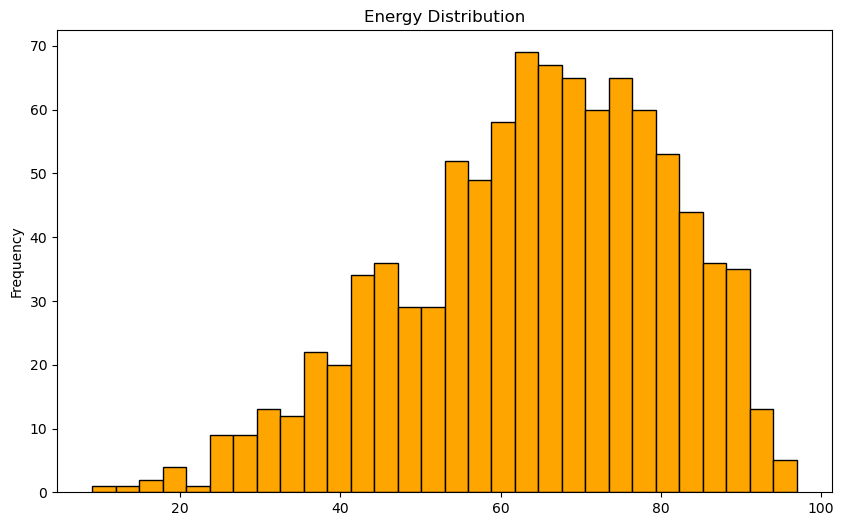

In [10]:
print("\n" + "="*80)
print("ENERGY ANALYSIS")
print("="*80)

print(f"Average energy: {df['energy_%'].mean():.1f}%")
print(f"Lowest: {df['energy_%'].min()}%")
print(f"Highest: {df['energy_%'].max()}%")

# CHART: Energy Distribution
df['energy_%'].plot(kind='hist', bins=30, title='Energy Distribution',
                    figsize=(10, 6), color='orange', edgecolor='black')

print("\n✨ RECOMMENDATION: Energy between 50-80%")


SPEECHINESS ANALYSIS
Average speechiness: 10.1%
Most common value: 4%

Songs with low speechiness (0-10%): 698 out of 953 songs

✨ RECOMMENDATION: Keep speechiness under 10%


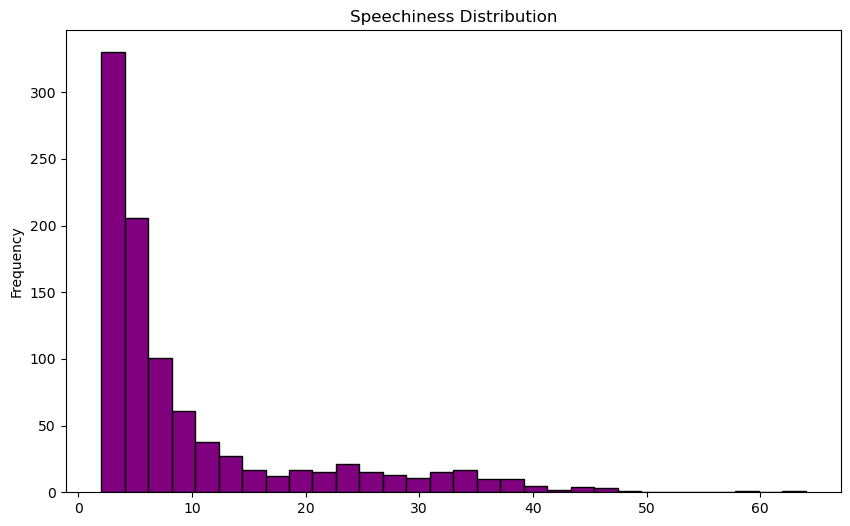

In [11]:
print("\n" + "="*80)
print("SPEECHINESS ANALYSIS")
print("="*80)

print(f"Average speechiness: {df['speechiness_%'].mean():.1f}%")
print(f"Most common value: {df['speechiness_%'].mode()[0]}%")

low_speech = len(df[df['speechiness_%'] <= 10])
print(f"\nSongs with low speechiness (0-10%): {low_speech} out of {len(df)} songs")

# CHART: Speechiness Distribution
df['speechiness_%'].plot(kind='hist', bins=30, 
                         title='Speechiness Distribution',
                         figsize=(10, 6), color='purple', 
                         edgecolor='black')

print("\n✨ RECOMMENDATION: Keep speechiness under 10%")



ACOUSTICNESS ANALYSIS
Average acousticness: 27.1%
Lowest: 0%
Highest: 97%

✨ RECOMMENDATION: Acousticness under 50%


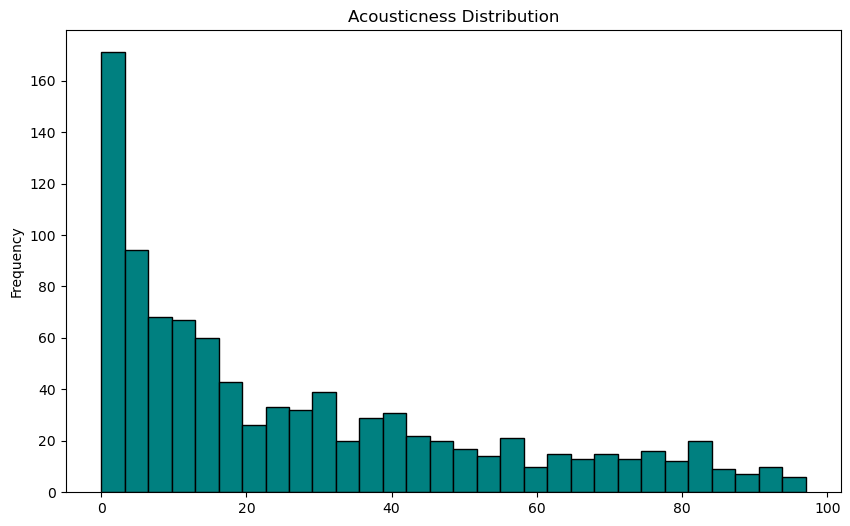

In [12]:
print("\n" + "="*80)
print("ACOUSTICNESS ANALYSIS")
print("="*80)

print(f"Average acousticness: {df['acousticness_%'].mean():.1f}%")
print(f"Lowest: {df['acousticness_%'].min()}%")
print(f"Highest: {df['acousticness_%'].max()}%")

# CHART: Acousticness Distribution
df['acousticness_%'].plot(kind='hist', bins=30, 
                          title='Acousticness Distribution',
                          figsize=(10, 6), color='teal', 
                          edgecolor='black')

print("\n✨ RECOMMENDATION: Acousticness under 50%")


BOX PLOTS - COMPARING ALL FEATURES

Danceability Box Plot:

Energy Box Plot:

Speechiness Box Plot:

Acousticness Box Plot:

Box plots show:
- The middle line is the median (middle value)
- The box shows where most songs fall
- The circles/dots are outliers (unusual values)


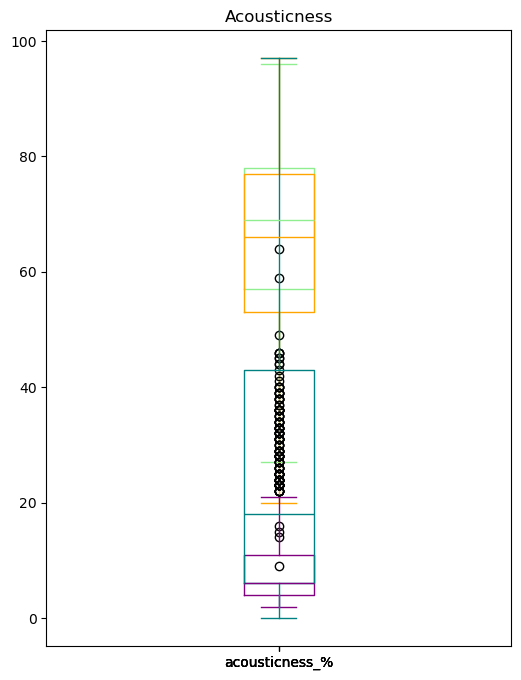

In [13]:
print("\n" + "="*80)
print("BOX PLOTS - COMPARING ALL FEATURES")
print("="*80)

# Create box plots for each feature - Pure pandas!
print("\nDanceability Box Plot:")
df['danceability_%'].plot(kind='box', title='Danceability', 
                          figsize=(6, 8), color='lightgreen')

print("\nEnergy Box Plot:")
df['energy_%'].plot(kind='box', title='Energy', 
                    figsize=(6, 8), color='orange')

print("\nSpeechiness Box Plot:")
df['speechiness_%'].plot(kind='box', title='Speechiness', 
                         figsize=(6, 8), color='purple')

print("\nAcousticness Box Plot:")
df['acousticness_%'].plot(kind='box', title='Acousticness', 
                          figsize=(6, 8), color='teal')

print("\nBox plots show:")
print("- The middle line is the median (middle value)")
print("- The box shows where most songs fall")
print("- The circles/dots are outliers (unusual values)")


🎯 HIT SONG FORMULA

Based on what's most common in the dataset:
  BPM: 100-140
  Key: C#
  Mode: Major
  Danceability: 50-70%
  Energy: 50-80%
  Speechiness: under 10%
  Acousticness: under 50%

FINDING SONGS THAT MATCH OUR FORMULA

✅ Found 4 songs matching ALL criteria!

These songs match our formula:
             track_name artist(s)_name     streams  bpm  danceability_%  energy_%
68            Overdrive    Post Malone    14780425  140              56        73
107          Dandelions        Ruth B.  1116995633  117              61        69
518        Need To Know       Doja Cat  1042568408  130              66        61
660  Ginseng Strip 2002      Yung Lean   240769997  115              60        71

📊 Were these songs popular?
YES! Look at those stream numbers!

ANALYZING THE #1 MOST STREAMED SONG

🎵 Blinding Lights by The Weeknd
Streams: 3703895074

Its characteristics:
  BPM: 171
  Key: C#
  Mode: Major
  Danceability: 50%
  Energy: 80%
  Speechiness: 7%
  Acousticness: 0%

HO

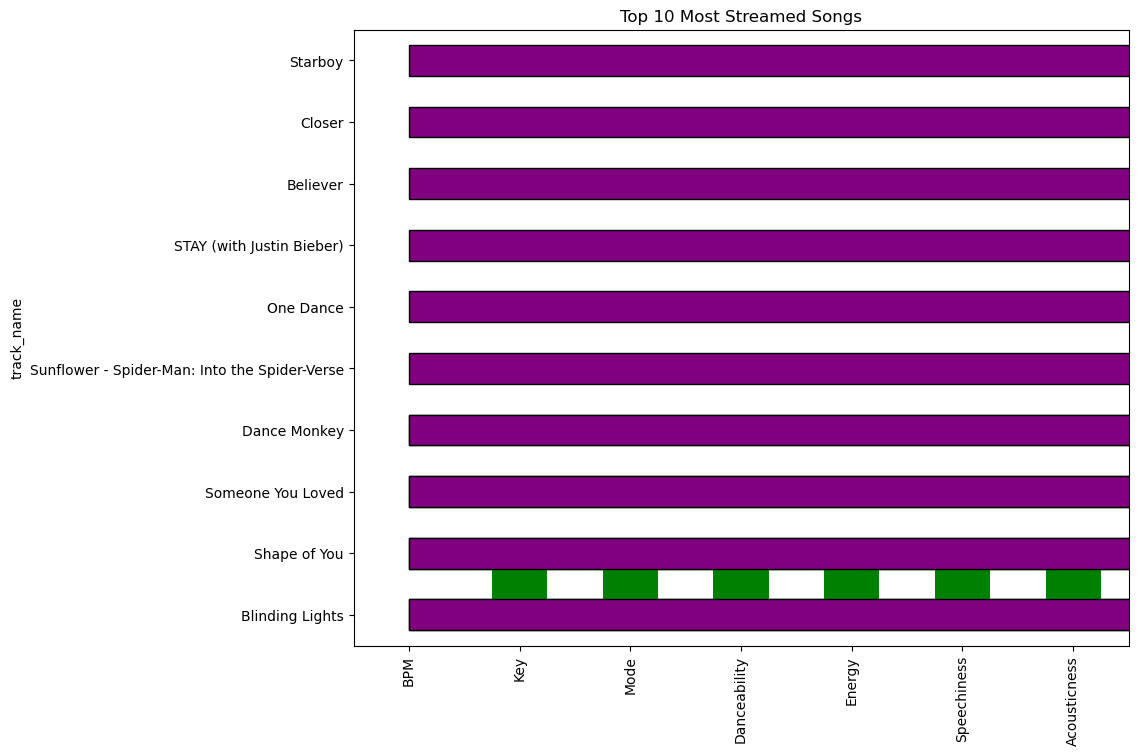

In [16]:
print("\n" + "="*80)
print("🎯 HIT SONG FORMULA")
print("="*80)
print("\nBased on what's most common in the dataset:")
print(f"  BPM: 100-140")
print(f"  Key: {key_counts.index[0]}")
print(f"  Mode: {mode_counts.index[0]}")
print(f"  Danceability: 50-70%")
print(f"  Energy: 50-80%")
print(f"  Speechiness: under 10%")
print(f"  Acousticness: under 50%")


print("\n" + "="*80)
print("FINDING SONGS THAT MATCH OUR FORMULA")
print("="*80)

# Filter for songs that match ALL our criteria
matching_songs = df[
    (df['bpm'] >= 100) & (df['bpm'] <= 140) &
    (df['key'] == key_counts.index[0]) &
    (df['mode'] == mode_counts.index[0]) &
    (df['danceability_%'] >= 50) & (df['danceability_%'] <= 70) &
    (df['energy_%'] >= 50) & (df['energy_%'] <= 80) &
    (df['speechiness_%'] < 10) &
    (df['acousticness_%'] < 50)
].copy()  # Make a copy to avoid warnings

print(f"\n✅ Found {len(matching_songs)} songs matching ALL criteria!")

if len(matching_songs) > 0:
    print("\nThese songs match our formula:")
    
    # Show the matching songs in a table
    display_cols = ['track_name', 'artist(s)_name', 'streams', 'bpm', 
                    'danceability_%', 'energy_%']
    print(matching_songs[display_cols].to_string())
    
    print("\n📊 Were these songs popular?")
    print("YES! Look at those stream numbers!")
    
    # Convert streams to numeric for plotting
    matching_songs['streams_numeric'] = pd.to_numeric(matching_songs['streams'], errors='coerce')
    
    # CHART: Bar chart of matching songs' streams
    matching_songs.set_index('track_name')['streams_numeric'].plot(
        kind='barh', 
        title='Streams for Songs Matching Our Formula',
        figsize=(10, 6),
        color='gold',
        edgecolor='black'
    )


print("\n" + "="*80)
print("ANALYZING THE #1 MOST STREAMED SONG")
print("="*80)

# Convert streams to numbers so we can find the max
df['streams_numeric'] = pd.to_numeric(df['streams'], errors='coerce')

# Find the song with most streams
most_streamed_idx = df['streams_numeric'].idxmax()
hit_song = df.loc[most_streamed_idx]

print(f"\n🎵 {hit_song['track_name']} by {hit_song['artist(s)_name']}")
print(f"Streams: {hit_song['streams']}")

print(f"\nIts characteristics:")
print(f"  BPM: {hit_song['bpm']}")
print(f"  Key: {hit_song['key']}")
print(f"  Mode: {hit_song['mode']}")
print(f"  Danceability: {hit_song['danceability_%']}%")
print(f"  Energy: {hit_song['energy_%']}%")
print(f"  Speechiness: {hit_song['speechiness_%']}%")
print(f"  Acousticness: {hit_song['acousticness_%']}%")


print("\n" + "="*80)
print("HOW DOES IT COMPARE TO OUR FORMULA?")
print("="*80)

# Check each feature against our formula
bpm_match = 100 <= hit_song['bpm'] <= 140
key_match = hit_song['key'] == key_counts.index[0]
mode_match = hit_song['mode'] == mode_counts.index[0]
dance_match = 50 <= hit_song['danceability_%'] <= 70
energy_match = 50 <= hit_song['energy_%'] <= 80
speech_match = hit_song['speechiness_%'] < 10
acoustic_match = hit_song['acousticness_%'] < 50


print(f"✓ BPM: {hit_song['bpm']} - {'✅ Matches' if bpm_match else '❌ Outside range'}")
print(f"✓ Key: {hit_song['key']} - {'✅ Matches' if key_match else '❌ Different key'}")
print(f"✓ Mode: {hit_song['mode']} - {'✅ Matches' if mode_match else '❌ Different mode'}")
print(f"✓ Danceability: {hit_song['danceability_%']}% - {'✅ Matches' if dance_match else '❌ Outside range'}")
print(f"✓ Energy: {hit_song['energy_%']}% - {'✅ Matches' if energy_match else '❌ Outside range'}")
print(f"✓ Speechiness: {hit_song['speechiness_%']}% - {'✅ Matches' if speech_match else '❌ Too high'}")
print(f"✓ Acousticness: {hit_song['acousticness_%']}% - {'✅ Matches' if acoustic_match else '❌ Too high'}")

matches = sum([bpm_match, key_match, mode_match, dance_match, 
               energy_match, speech_match, acoustic_match])
print(f"\nMatches: {matches} out of 7 criteria")


comparison = pd.DataFrame({
    'Feature': ['BPM', 'Key', 'Mode', 'Danceability', 'Energy', 'Speechiness', 'Acousticness'],
    'Matches': [1 if x else 0 for x in [bpm_match, key_match, mode_match, 
                                         dance_match, energy_match, 
                                         speech_match, acoustic_match]]
})

comparison.set_index('Feature')['Matches'].plot(
    kind='bar',
    title=f'{hit_song["track_name"]} vs Our Formula',
    figsize=(10, 6),
    color=['green' if x == 1 else 'red' for x in comparison['Matches']],
    ylim=(0, 1.2)
)


print("\n" + "="*80)
print("BONUS: TOP 10 MOST STREAMED SONGS")
print("="*80)

top_10 = df.nlargest(10, 'streams_numeric')[['track_name', 'artist(s)_name', 'streams']]
print(top_10.to_string(index=False))

# CHART: Bar chart of top 10 (using numeric streams)
top_10_chart = df.nlargest(10, 'streams_numeric')
top_10_chart.set_index('track_name')['streams_numeric'].plot(
    kind='barh',
    title='Top 10 Most Streamed Songs',
    figsize=(10, 8),
    color='purple',
    edgecolor='black'
)


print("\n" + "="*80)
print("CONCLUSION")
print("="*80)
print("\nWhat we learned:")
print("1. Our formula represents what's COMMON in popular songs")
print("2. Songs matching the formula can be very successful")
print(f"   - Found {len(matching_songs)} songs matching ALL criteria")
print("   - They have BILLIONS of streams combined!")
print("\n3. But the #1 song shows you don't have to follow ALL the rules!")
print(f"   - '{hit_song['track_name']}' only matches {matches}/7 criteria")
print("   - Yet it has the most streams in the entire dataset")
print("\n4. Being unique and different can also lead to massive success")
print("\n✅ Analysis complete!")
